In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

timeperiod=365

df = yf.Ticker("BTC-USD").history(period="max").reset_index()[["Date","Open"]]

df = df.rename(columns = {"Open":"btc"})
df["Date"] = pd.to_datetime(df["Date"])
print(df)

           Date           btc
0    2014-09-17    465.864014
1    2014-09-18    456.859985
2    2014-09-19    424.102997
3    2014-09-20    394.673004
4    2014-09-21    408.084991
...         ...           ...
2517 2021-08-12  45576.878906
2518 2021-08-13  44439.691406
2519 2021-08-14  47810.687500
2520 2021-08-15  47096.667969
2521 2021-08-16  47097.796875

[2522 rows x 2 columns]


In [2]:
ethdata = yf.Ticker("ETH-USD").history(period="max").reset_index()[["Date","Open"]]
ethdata = ethdata.rename(columns = {"Open":"eth"})
ethdata["Date"] = pd.to_datetime(ethdata["Date"])

df = df.merge(ethdata, on="Date", how="left")

print(df)

           Date           btc          eth
0    2014-09-17    465.864014          NaN
1    2014-09-18    456.859985          NaN
2    2014-09-19    424.102997          NaN
3    2014-09-20    394.673004          NaN
4    2014-09-21    408.084991          NaN
...         ...           ...          ...
2517 2021-08-12  45576.878906  3164.175781
2518 2021-08-13  44439.691406  3049.001221
2519 2021-08-14  47810.687500  3322.762695
2520 2021-08-15  47096.667969  3266.276123
2521 2021-08-16  47097.796875  3311.708740

[2522 rows x 3 columns]


In [3]:
df["btcret"] = 100 *(df["btc"]/df["btc"].shift(timeperiod) -1)
df["ethret"] = 100 *(df["eth"]/df["eth"].shift(timeperiod) -1)

df["btcstd"] = df["btcret"].rolling(timeperiod).std()
df["ethstd"] = df["ethret"].rolling(timeperiod).std()

df["btcsharpe"] = df["btcret"]/df["btcstd"]
df["ethsharpe"] = df["ethret"]/df["ethstd"]

print(df["btcsharpe"], df["ethsharpe"] )

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2517    1.201022
2518    1.173267
2519    1.264893
2520    1.311894
2521    1.287188
Name: btcsharpe, Length: 2522, dtype: float64 0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2517    1.497136
2518    1.455729
2519    1.586406
2520    1.632851
2521    1.610137
Name: ethsharpe, Length: 2522, dtype: float64


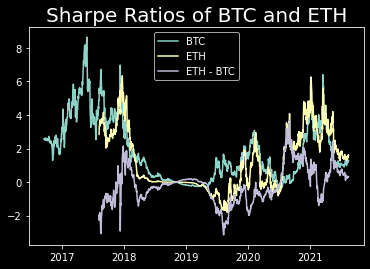

In [4]:
plt.style.use("dark_background")

plt.plot(df["Date"],df["btcsharpe"], label="BTC")
plt.plot(df["Date"],df["ethsharpe"], label="ETH")

plt.plot(df["Date"],df["ethsharpe"] - df["btcsharpe"], label="ETH - BTC")

plt.title("Sharpe Ratios of BTC and ETH", size = 20)
plt.legend()
plt.show()